In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np


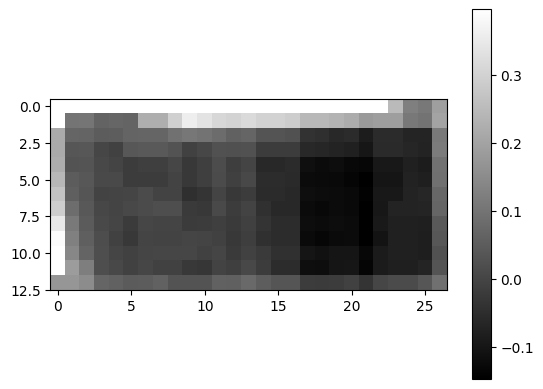

Image shape: (13, 27)
Number of bands: 1
Width: 27
Height: 13


In [2]:

# Open the TIFF file
with rasterio.open('NDMI_2019-03-12_to_2019-03-19.tif') as src:
    # Read the data
    image = src.read()
    
    # If it's a single band image
    if src.count == 1:
        # Read the first band
        image = src.read(1)
        
        # Display the image
        plt.imshow(image, cmap='gray')
        plt.colorbar()
        plt.show()
        
    # If it's a multi-band image (e.g., RGB)
    elif src.count == 3:
        # Read all bands and transpose to correct shape for plotting
        image = np.transpose(image, (1, 2, 0))
        
        # Display the image
        plt.imshow(image)
        plt.colorbar()
        plt.show()
    
    # Print basic metadata
    print(f"Image shape: {image.shape}")
    print(f"Number of bands: {src.count}")
    print(f"Width: {src.width}")
    print(f"Height: {src.height}")

Image shape: (13, 27)
Data type: float32


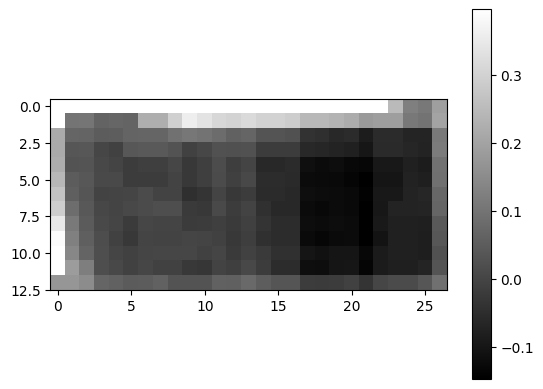

Number of pages: 1


In [1]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np

# Read the TIFF image
img = tifffile.imread('NDMI_2019-03-12_to_2019-03-19.tif')

# Print basic information
print(f"Image shape: {img.shape}")
print(f"Data type: {img.dtype}")

# Display the image based on dimensionality
if len(img.shape) == 2:  # Single channel/grayscale
    plt.imshow(img, cmap='gray')
    plt.colorbar()
    plt.show()

elif len(img.shape) == 3:  # Multi-channel (like RGB)
    if img.shape[2] == 3:  # RGB image
        plt.imshow(img)
    else:  # Multiple z-slices or time series
        # Show first slice/frame
        plt.imshow(img[0], cmap='gray')
    plt.colorbar()
    plt.show()

# To save a TIFF image
tifffile.imwrite('output.tiff', img)

# For multi-page TIFF, you can read specific pages
with tifffile.TiffFile('NDMI_2019-03-12_to_2019-03-19.tif') as tif:
    # Print number of pages
    print(f"Number of pages: {len(tif.pages)}")
    
    # Read specific page (e.g., first page)
    page = tif.pages[0]
    page_img = page.asarray()